# Test Gaussian process.

## Setup

In [1]:
import os
import sys

os.chdir("..")

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src import load, munge
import src.models.gp

## Load data.

In [3]:
matches = load.all_matches_df()

In [4]:
matches

,dire_name,dire_nicknames,dire_players,dire_valveId,duration,league_id,league_name,radiantVictory,radiant_name,radiant_nicknames,radiant_players,radiant_valveId,seriesId,startDate,startTimestamp
matchId,,,,,,,,,,,,,,,
4904311356,Forward Gaming,"[pieliedie, Sneyking, MSS, YawaR, CCnC]","[6922000, 10366616, 86726887, 108452107, 22166...",6214538,1964,10749,The International 2019,False,J.Storm,"[Moo, Resolut1on, Fear, 1437, nine]","[84429681, 86725175, 87177591, 87196890, 94786...",6288801,348164,2019-07-15 01:30:53,1563154253000
4904261164,J.Storm,"[Moo, Resolut1on, Fear, 1437, nine]","[84429681, 86725175, 87177591, 87196890, 94786...",6288801,1901,10749,The International 2019,True,Forward Gaming,"[pieliedie, Sneyking, MSS, YawaR, CCnC]","[6922000, 10366616, 86726887, 108452107, 22166...",6214538,348164,2019-07-15 00:19:24,1563149964000
4904218149,Forward Gaming,"[pieliedie, Sneyking, MSS, YawaR, CCnC]","[6922000, 10366616, 86726887, 108452107, 22166...",6214538,1956,10749,The International 2019,False,J.Storm,"[Moo, Resolut1on, Fear, 1437, nine]","[84429681, 86725175, 87177591, 87196890, 94786...",6288801,348164,2019-07-14 23:14:58,1563146098000
4904171017,J.Storm,"[Moo, Resolut1on, Fear, 1437, nine]","[84429681, 86725175, 87177591, 87196890, 94786...",6288801,2034,10749,The International 2019,False,Forward Gaming,"[pieliedie, Sneyking, MSS, YawaR, CCnC]","[6922000, 10366616, 86726887, 108452107, 22166...",6214538,348164,2019-07-14 22:09:50,1563142190000
4904062522,J.Storm,"[Moo, Resolut1on, Fear, 1437, nine]","[84429681, 86725175, 87177591, 87196890, 94786...",6288801,1817,10749,The International 2019,False,beastcoast,"[Brax, ixmike88, Ryoya, M-GOD, MoOz]","[31818853, 86715129, 115141430, 131706718, 349...",7079109,348080,2019-07-14 20:18:11,1563135491000
4903974414,J.Storm,"[Moo, Resolut1on, Fear, 1437, nine]","[84429681, 86725175, 87177591, 87196890, 94786...",6288801,2495,10749,The International 2019,False,beastcoast,"[Brax, ixmike88, Ryoya, M-GOD, MoOz]","[31818853, 86715129, 115141430, 131706718, 349...",7079109,348080,2019-07-14 19:02:07,1563130927000
4903679968,The Final Tribe,"[Handsken, Xibbe, Era, Frost, Chessie]","[18180970, 50580004, 100317750, 169359249, 172...",5059375,2521,10749,The International 2019,True,Chaos Esports Club,"[MATUMBAMAN, MISERY, MiLAN, vtFaded, KheZu]","[72312627, 87382579, 98172857, 142139318, 1690...",7203342,347944,2019-07-14 15:37:48,1563118668000
4903566049,Chaos Esports Club,"[MATUMBAMAN, MISERY, MiLAN, vtFaded, KheZu]","[72312627, 87382579, 98172857, 142139318, 1690...",7203342,1772,10749,The International 2019,False,The Final Tribe,"[Handsken, Xibbe, Era, Frost, Chessie]","[18180970, 50580004, 100317750, 169359249, 172...",5059375,347944,2019-07-14 14:41:46,1563115306000
4903441151,The Final Tribe,"[Handsken, Xibbe, Era, Frost, Chessie]","[18180970, 50580004, 100317750, 169359249, 172...",5059375,1460,10749,The International 2019,True,Chaos Esports Club,"[MATUMBAMAN, MISERY, MiLAN, vtFaded, KheZu]","[72312627, 87382579, 98172857, 142139318, 1690...",7203342,347944,2019-07-14 13:51:03,1563112263000


In [66]:
matches_ti9 = matches.loc[matches.league_name == "The International 2019"]
matches_ti9.shape

(268, 15)

### Tangent: Radiant vs Dire win rate.

In [5]:
matches.radiantVictory.value_counts(True)

True     0.544
False    0.456
Name: radiantVictory, dtype: float64

In [6]:
def radiant_win_rate(s):
    return sum(s) / len(s)
def dire_win_rate(s):
    return 1 - radiant_win_rate(s)

In [7]:
temp = pd.concat([
    matches.groupby("radiant_name").agg({"radiantVictory": radiant_win_rate}),
    matches.groupby("dire_name").agg({"radiantVictory": dire_win_rate})],
    1,
    sort=True
)
temp.columns = ["radiant", "dire"]
temp.sort_values("radiant", ascending=False)

,radiant,dire
Team Freedom Dota 2,1.000000,1.000000
DreamEaters,1.000000,0.000000
CoM18Anji,1.000000,0.000000
DeathBringer Gaming,1.000000,0.000000
ReckoninG eSports,1.000000,NaN
Anticoagulation,1.000000,0.000000
Team Odd,1.000000,NaN
New Guys,0.900000,0.400000
Butterfly Effec,0.833333,0.750000
TeamJeKich,0.833333,0.250000


In [8]:
players_mat = munge.make_match_players_matrix(matches.dire_players,
                                              matches.radiant_players)

### Compute number of games by player.

In [9]:
game_count_by_player = abs(players_mat).sum()
game_count_by_player.value_counts().sort_index()

1.0      101
2.0       79
3.0       44
4.0       53
5.0       19
6.0       34
7.0       44
8.0       24
9.0       17
10.0      34
11.0      16
12.0      19
13.0      18
14.0      10
15.0      10
16.0      13
17.0       2
18.0      12
19.0      12
20.0      10
21.0      12
22.0       3
23.0       9
24.0      12
25.0       3
26.0       5
27.0       3
28.0       2
29.0       7
30.0       3
        ... 
236.0      1
237.0      3
238.0      1
241.0      1
242.0      1
243.0      1
248.0      1
251.0      3
252.0      1
256.0      1
257.0      1
258.0      1
259.0      4
262.0      2
268.0      1
272.0      2
273.0      1
274.0      2
279.0      3
281.0      2
282.0      4
287.0      4
288.0      1
294.0      1
300.0      2
302.0      1
312.0      2
316.0      1
333.0      1
349.0      1
Length: 196, dtype: int64

## Finally, try the class.

### Create the GP class with only TI9 matches.

In [91]:
players_mat_ti9 = munge.make_match_players_matrix(
    matches_ti9.radiant_players, matches_ti9.dire_players)

In [110]:
import importlib
importlib.reload(src.models.gp)

<module 'src.models.gp' from '/Users/yl3/github/dota2/src/models/gp.py'>

In [92]:
two_years_in_ms = 2 * 365 * 24 * 60 * 60 * 1000
gp = src.models.gp.SkillsGP(players_mat_ti9.values,
                            matches_ti9.startTimestamp,
                            matches_ti9.radiantVictory,
                            matches_ti9.columns.values,
                            "exponential", {"scale": two_years_in_ms},
                            propose_sd=0.1, save_every_n_iter=100)

Computing self.radiant_win...
Computing self.nanmask...
Computing self.flat_nanmask...
Computing self.cov_func...
Computing self.cov_mat...
Computing self.prior_multinorm...


### Fit the model.

In [93]:
gp.iterate(100000)

100% (100000 of 100000) |################| Elapsed Time: 0:12:17 Time:  0:12:17


In [94]:
len(gp.samples)

1000

In [95]:
gp.samples[-1]

(99900, array([ 1.31817471,  0.93915514,  0.47520246, ..., -2.34534759,
        -2.27963155,  1.26215924]), -6085140.414427371)

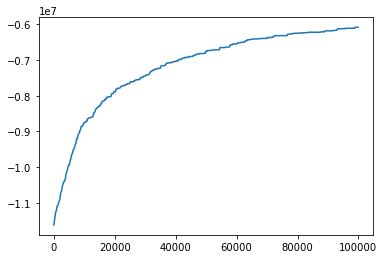

In [96]:
plt.plot([x[0] for x in gp.samples], [x[2] for x in gp.samples])

### Explore results.

In [165]:
import importlib
importlib.reload(src.munge)

<module 'src.munge' from '/Users/yl3/github/dota2/src/munge.py'>

In [166]:
name_of_player_id = munge.player_id_to_player_name(
    pd.concat([matches_ti9.radiant_players, matches_ti9.dire_players]),
    pd.concat([matches_ti9.radiant_nicknames, matches_ti9.dire_nicknames]),
    pd.concat([matches_ti9.radiant_valveId, matches_ti9.dire_valveId]),
    pd.concat([matches_ti9.radiant_name, matches_ti9.dire_name]),)

In [167]:
name_of_player_id

,name,team,team_id
84429681,Moo,J.Storm,J.Storm
86725175,Resolut1on,J.Storm,J.Storm
87177591,Fear,J.Storm,J.Storm
87196890,1437,J.Storm,J.Storm
94786276,nine,J.Storm,J.Storm
6922000,pieliedie,Forward Gaming,Forward Gaming
10366616,Sneyking,Forward Gaming,Forward Gaming
86726887,MSS,Forward Gaming,Forward Gaming
108452107,YawaR,Forward Gaming,Forward Gaming
221666230,CCnC,Forward Gaming,Forward Gaming


### Compute fitted skills from the last 10,000 saved iterations.

In [147]:
skills_vecs = np.array([x[1] for x in gp.samples[-1000:]])

In [182]:
fitted_skills = pd.DataFrame(
    gp.to_mat(skills_vecs.mean(0)),
    columns=name_of_player_id.name[players_mat_ti9.columns],
    index=matches_ti9.startDate
)

In [181]:
fitted_sd = pd.DataFrame(
    gp.to_mat(skills_vecs.std(0)),
    columns=name_of_player_id.name[players_mat_ti9.columns],
    index=matches_ti9.startDate
)

In [151]:
fitted_skills

,EGM,March,syndereN,pieliedie,Sneyking,VANSKOR,Limmp,Handsken,SexyBamboe,Illidan,...,DarkMago♥,,23savage,TeravisuParkur,,Nikobaby,esK,ASD,gPk~,zipzap
startDate,,,,,,,,,,,,,,,,,,,,,
2019-07-15 01:30:53,NaN,NaN,NaN,1.031273,1.280984,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-15 00:19:24,NaN,NaN,NaN,0.659099,-0.246229,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-14 23:14:58,NaN,NaN,NaN,0.090151,-0.178276,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-14 22:09:50,NaN,NaN,NaN,0.332122,-0.579594,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-14 20:18:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-14 19:02:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-14 15:37:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.356059,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-14 14:41:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.542495,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-14 13:51:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.697868,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
beastcoast_players = \
    name_of_player_id.name[name_of_player_id.team == "beastcoast"]
fitted_skills.loc[:, beastcoast_players].dropna().sum(1)

startDate
2019-07-14 20:18:11    3.261706
2019-07-14 19:02:07    3.933077
2019-07-13 21:37:01   -3.680288
2019-07-13 20:37:17   -1.971247
2019-07-13 19:13:43   -3.107501
2019-07-13 18:04:37   -3.419786
2019-07-12 21:20:54   -2.676036
2019-07-12 19:18:44   -2.970795
2019-07-12 02:00:18    1.417041
2019-07-12 00:33:39    3.909504
2019-07-11 22:14:41    5.343183
2019-07-11 19:40:06    2.175079
2019-07-11 17:30:21   -1.387865
dtype: float64

In [186]:
(fitted_sd.loc[:, beastcoast_players].dropna() ** 2).sum(1) ** 0.5

startDate
2019-07-14 20:18:11    0.763916
2019-07-14 19:02:07    1.015166
2019-07-13 21:37:01    1.383773
2019-07-13 20:37:17    1.022078
2019-07-13 19:13:43    1.069085
2019-07-13 18:04:37    0.971949
2019-07-12 21:20:54    1.280155
2019-07-12 19:18:44    1.414581
2019-07-12 02:00:18    1.034919
2019-07-12 00:33:39    1.195537
2019-07-11 22:14:41    1.787021
2019-07-11 19:40:06    1.536493
2019-07-11 17:30:21    1.419185
dtype: float64

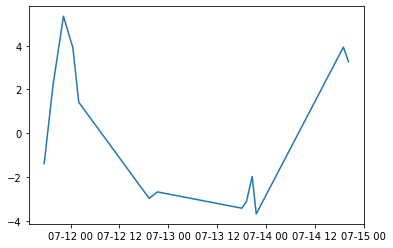

In [176]:
plt.plot(fitted_skills.loc[:, beastcoast_players].dropna().sum(1))